# Indian House Price Prediction:


### > Goal is to make a linear regresion model and train it on the data and check for Further predictions.


# Importing Required Library:


*   pandas
*   matplotlib
*   seaborn
*   numpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For data split and standtiztion.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn import linear_model

# for determing the acuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error




# Load the Dataset:

*   Here we have **House Price India.csv**

In [3]:
dataset = pd.read_csv('House Price India.csv')
dataset.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


# Analysizg the dataset:


In [4]:
print(dataset.info()) # these are the collums in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

Report:
it shows that we have 22 collumns form which , Date , id  is not so usable

In [5]:
dataset.drop(['id'] , axis=1 , inplace=True)
dataset.drop(['Date'] , axis=1 , inplace=True)
# Removed all the unwanted columns.

In [6]:
dataset.describe()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,7.682421,1801.783926,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,1.175033,833.809963,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [7]:
dataset.isnull().sum() # this just tells that there is no cell which is empty that is good for the model predictions.

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [8]:
# Corelations in the data

dataset.corr()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
number of bedrooms,1.000000,0.509784,0.570526,0.034416,0.177294,-0.006257,0.078665,0.026597,0.352945,0.473599,...,0.152954,0.016132,-0.044156,-0.013163,0.135712,0.389855,0.029400,0.003397,-0.006157,0.308460
number of bathrooms,0.509784,1.000000,0.753517,0.080806,0.502924,0.060104,0.183789,-0.128232,0.663054,0.684391,...,0.498127,0.049669,-0.105546,0.031156,0.223904,0.570530,0.078627,0.002180,0.009206,0.531735
living area,0.570526,0.753517,1.000000,0.174420,0.354743,0.105837,0.287728,-0.063358,0.761835,0.875793,...,0.309602,0.059400,-0.080303,0.054518,0.240208,0.757571,0.180312,0.002370,0.002511,0.712169
lot area,0.034416,0.080806,0.174420,1.000000,-0.004138,0.026282,0.078308,-0.008548,0.110546,0.183553,...,0.051615,0.006848,0.070131,-0.090983,0.221432,0.149744,0.706812,-0.012671,0.003291,0.081992
number of floors,0.177294,0.502924,0.354743,-0.004138,1.000000,0.016316,0.020153,-0.269928,0.463082,0.525643,...,0.481565,0.006705,-0.129788,0.050731,0.127550,0.285093,-0.010120,-0.007579,0.016567,0.262732
waterfront present,-0.006257,0.060104,0.105837,0.026282,0.016316,1.000000,0.400206,0.018644,0.079831,0.071865,...,-0.024226,0.085865,0.038318,-0.021795,-0.047791,0.085743,0.032055,0.001563,0.001448,0.263687
number of views,0.078665,0.183789,0.287728,0.078308,0.020153,0.400206,1.000000,0.052533,0.254532,0.162672,...,-0.055357,0.102944,0.039268,-0.004555,-0.079706,0.281452,0.072300,0.008004,-0.001657,0.395973
condition of the house,0.026597,-0.128232,-0.063358,-0.008548,-0.269928,0.018644,0.052533,1.000000,-0.152530,-0.167695,...,-0.381718,-0.062126,0.045334,-0.002998,-0.121189,-0.099743,-0.004748,-0.006939,-0.002136,0.041376
grade of the house,0.352945,0.663054,0.761835,0.110546,0.463082,0.079831,0.254532,-0.152530,1.000000,0.758222,...,0.440358,0.014501,-0.146342,0.115256,0.203754,0.720019,0.116725,0.000986,0.004940,0.671814
Area of the house(excluding basement),0.473599,0.684391,0.875793,0.183553,0.525643,0.071865,0.162672,-0.167695,0.758222,1.000000,...,0.419369,0.025727,-0.083730,-0.000088,0.345899,0.737744,0.194670,-0.002894,0.001222,0.615220


to understand it better we can make a heatmap of the corr.

<Axes: >

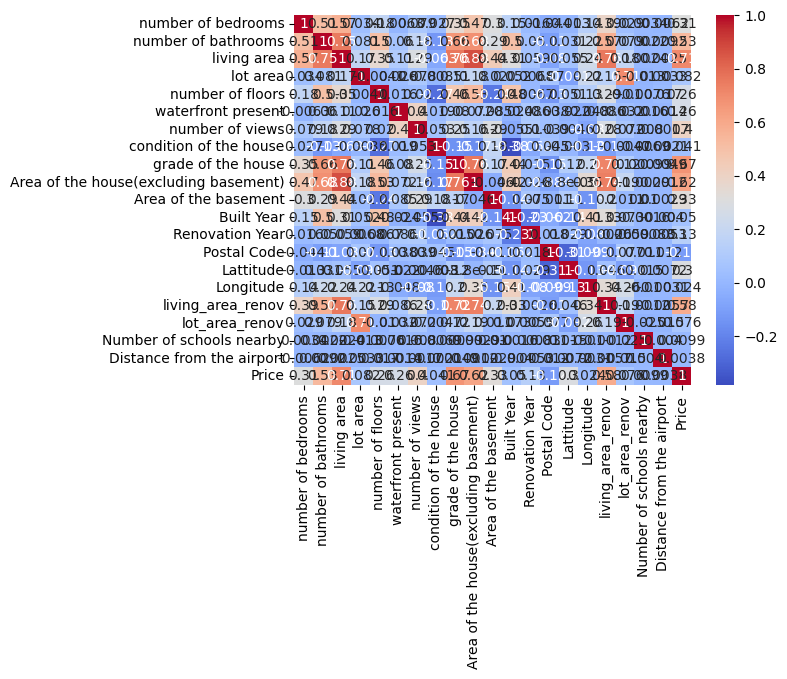

In [9]:
sns.heatmap(dataset.corr() , annot=True, cmap='coolwarm')
#

In [10]:
# sns.pairplot(dataset , corner=True , kind = 'reg')

# Train Test split and standardization.

In [11]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
Scalar = StandardScaler()

In [14]:
X_train = Scalar.fit_transform(X_train)
X_test = Scalar.transform(X_test)

In [ ]:
# import joblib
# joblib.dump(Scalar, 'scaler.joblib')


['scaler.joblib']

In [17]:
model = linear_model.LinearRegression()

In [18]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
model.score(X_test,y_test) ### this is the acuracy of the model.

0.6826762742142861

In [22]:
model_predict = model.predict(X_test)

In [23]:
resuidals = y_test - model_predict

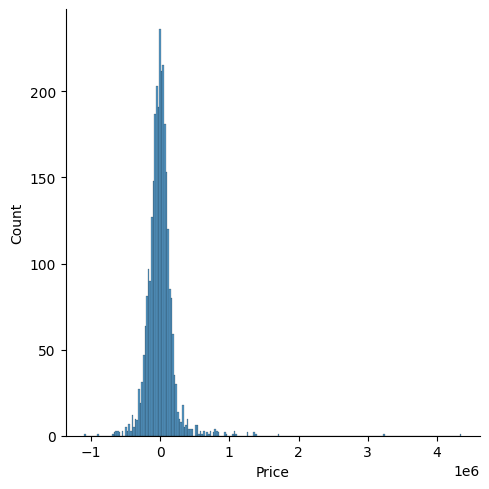

In [24]:
sns.displot(resuidals)

In [25]:
print(mean_absolute_error(y_test, model_predict))
print(np.sqrt(mean_squared_error(y_test, model_predict)))
score = r2_score(y_test, model_predict)
print(score)

123774.42797411977
209866.8321560322
0.6826762742142861


In [ ]:
# joblib.dump(model, 'model.joblib')


['model.joblib']